In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [66]:
data = pd.read_csv("titanic.csv")

In [ ]:
data = data[['Pclass', 'Sex', 'Age', 'Survived','Parch','SibSp']]

In [67]:
data = data[['Pclass','Age','Sex','SibSp','Survived']]

In [68]:
data.head(20)

,Pclass,Age,Sex,SibSp,Survived
0,3,22.0,male,1,0
1,1,38.0,female,1,1
2,3,26.0,female,0,1
3,1,35.0,female,1,1
4,3,35.0,male,0,0
5,3,NaN,male,0,0
6,1,54.0,male,0,0
7,3,2.0,male,3,0
8,3,27.0,female,0,1
9,2,14.0,female,1,1


In [69]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [70]:
data.head(25)

,Pclass,Age,Sex,SibSp,Survived
0,3,22.0,0,1,0
1,1,38.0,1,1,1
2,3,26.0,1,0,1
3,1,35.0,1,1,1
4,3,35.0,0,0,0
5,3,NaN,0,0,0
6,1,54.0,0,0,0
7,3,2.0,0,3,0
8,3,27.0,1,0,1
9,2,14.0,1,1,1


In [71]:
# drop all missing values in all columns
data = data.dropna()

In [ ]:
# Mean value imputation
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [72]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [74]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [75]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\PSMike\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.47%


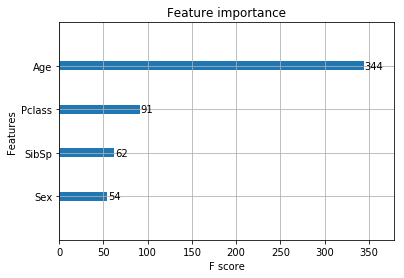

In [78]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model) 
pyplot.show()